<a href="https://colab.research.google.com/github/Anuj-gitch/DataScience/blob/main/Data_Analysis/Exploratory_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

How do we get from data to answers? Exploratory data analysis is a process for exploring datasets, answering questions, and visualizing results. This course presents the tools you need to clean and validate data, to visualize distributions and relationships between variables, and to use regression models to predict and explain. You'll explore data related to demographics and health, including the National Survey of Family Growth and the General Social Survey. But the methods you learn apply to all areas of science, engineering, and business. You'll use Pandas, a powerful library for working with data, and other core Python libraries including NumPy and SciPy, StatsModels for regression, and Matplotlib for visualization. With these tools and skills, you will be prepared to work with real data, make discoveries, and present compelling results.

## Read, clean, and validate

The first step of almost any data project is to read the data, check for errors and special cases, and prepare data for analysis. This is exactly what you'll do in this chapter, while working with a dataset obtained from the National Survey of Family Growth.



### Read the codebook
When you work with datasets like the NSFG, it is important to read the documentation carefully. If you interpret a variable incorrectly, you can generate nonsense results and never realize it. So, before we start coding, I want to make sure you are familiar with the NSFG codebook, which describes every variable.

CookBook : https://www.icpsr.umich.edu/icpsradmin/nsfg/index?studyNumber=9999

* Type "birthweight" in the search field, UNSELECT the checkbox that says "Search variable name only", and press "Search". You should see a list of variables related to birthweight.

* Click on "BIRTHWGT_OZ1" and read the documentation of this variable. For your convenience, it is also displayed here:

### Exploring the NSFG data
To get the number of rows and columns in a DataFrame, you can read its shape attribute.

To get the column names, you can read the columns attribute. The result is an Index, which is a Pandas data structure that is similar to a list. Let's begin exploring the NSFG data! It has been pre-loaded for you into a DataFrame called nsfg.

__Calculate the number of rows and columns in the DataFrame nsfg.__

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
nsfg = pd.read_hdf("/content/drive/My Drive/DataCamp_DataScience/Eploratory Data Analysis/nsfg.hdf5")

In [ ]:
nsfg.shape

(9358, 10)

__Display the names of the columns in nsfg.__

In [ ]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

__Select the column 'birthwgt_oz1' and assign it to a new variable called ounces.__

In [ ]:
ounces = nsfg.birthwgt_oz1

__Display the first 5 elements of ounces.__

In [ ]:
ounces.head()

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64

Nice job! Remember these attributes and methods; they are useful when you are exploring a new dataset. It's now time to check for errors and prepare the data for analysis. Keep going!

### Validate a variable

    In the NSFG dataset, the variable 'outcome' encodes the outcome of each pregnancy as shown below:

    value	label
    1	Live birth
    2	Induced abortion
    3	Stillbirth
    4	Miscarriage
    5	Ectopic pregnancy
    6	Current pregnancy
    The nsfg DataFrame has been pre-loaded for you. 
    Explore it in the IPython Shell and use the methods Allen showed you in the video to answer the following question: 
    How many pregnancies in this dataset ended with a live birth?

In [ ]:
sum(nsfg.outcome == 1)

6489

### Clean a variable
In the NSFG dataset, the variable 'nbrnaliv' records the number of babies born alive at the end of a pregnancy.

If you use .value_counts() to view the responses, you'll see that the value 8 appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question.

Your job in this exercise is to replace this value with np.nan. Recall from the video how Allen replaced the values 98 and 99 in the ounces column using the .replace() method:

    ounces.replace([98, 99], np.nan, inplace=True)

In [ ]:
nsfg.nbrnaliv.value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

* __In the 'nbrnaliv' column, replace the value 8, in place, with the special value NaN.__

* __Confirm that the value 8 no longer appears in this column by printing the values and their frequencies.__

In [ ]:
nsfg.nbrnaliv.replace([8],np.nan, inplace = True)

In [ ]:
nsfg.nbrnaliv.value_counts()

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

Excellent. If you are careful about this kind of cleaning and validation, it will save time (in the long run) and avoid potentially serious errors.

### Compute a variable

For each pregnancy in the NSFG dataset, the variable 'agecon' encodes the respondent's age at conception, and 'agepreg' the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value 2575 means that the respondent's age was 25.75.

__Select 'agecon' and 'agepreg', divide them by 100, and assign them to the local variables agecon and agepreg__

In [ ]:
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

In [ ]:
agecon

0       20.00
1       22.91
2       32.41
3       36.50
4       21.91
        ...  
9353    17.58
9354    17.41
9355    20.91
9356    34.50
9357    36.83
Name: agecon, Length: 9358, dtype: float64

In [ ]:
agepreg

0       20.75
1       23.58
2       33.08
3         NaN
4       22.66
        ...  
9353    18.25
9354    18.16
9355    21.58
9356    35.25
9357    37.58
Name: agepreg, Length: 9358, dtype: float64

__Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, agepreg will be larger than agecon.__

In [ ]:
preg_length = agepreg - agecon

In [ ]:
preg_length

0       0.75
1       0.67
2       0.67
3        NaN
4       0.75
        ... 
9353    0.67
9354    0.75
9355    0.67
9356    0.75
9357    0.75
Length: 9358, dtype: float64

In [ ]:
preg_length.describe()

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64

 A variable that's computed from other variables is sometimes called a 'recode'. 

### Make a histogram
Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

As we saw in a previous exercise, the NSFG dataset includes a variable 'agecon' that records age at conception for each pregnancy. Here, you're going to plot a histogram of this variable. You'll use the bins parameter that you saw in the video, and also a new parameter - histtype - which you can read more about here in the matplotlib documentation. Learning how to read documentation is an essential skill. If you want to learn more about matplotlib, you can check out DataCamp's Introduction to Matplotlib course.

__Plot a histogram of agecon with 20 bins.__

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

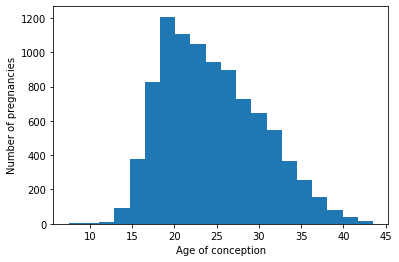

In [ ]:
plt.hist(agecon, bins = 20)
plt.xlabel('Age of conception')
plt.ylabel('Number of pregnancies')
plt.show()

__Adapt your code to make an unfilled histogram by setting the parameter histtype to be 'step'.__

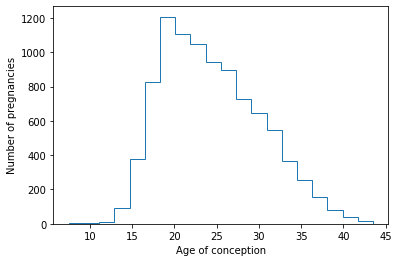

In [ ]:
plt.hist(agecon, bins = 20, histtype= 'step')

plt.xlabel('Age of conception')
plt.ylabel('Number of pregnancies')

plt.show()

###Compute birth weight
    Now let's pull together the steps in this chapter to compute the average birth weight for full-term babies.

    I've provided a function, resample_rows_weighted, that takes the NSFG data and resamples it using the sampling weights in wgt2013_2015. 
    The result is a sample that is representative of the U.S. population.

    Then I extract birthwgt_lb1 and birthwgt_oz1, replace special codes with NaN, and compute total birth weight in pounds, birth_weight.

    # Resample the data
    nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

    # Clean the weight variables
    pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
    ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

    # Compute total birth weight
    birth_weight = pounds + ounces/16

In [ ]:
nsfg

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914
...,...,...,...,...,...,...,...,...,...,...
9353,70615,1,4.0,11.0,35,1.0,1758,1825.0,22.0,8117.554461
9354,70616,1,8.0,7.0,42,1.0,1741,1816.0,18.0,6842.240477
9355,70616,1,7.0,6.0,36,1.0,2091,2158.0,23.0,6842.240477
9356,70619,1,8.0,3.0,41,1.0,3450,3525.0,31.0,3856.253532


* Make a Boolean Series called full_term that is true for babies with 'prglngth' greater than or equal to 37 weeks.

* Use full_term and birth_weight to select birth weight in pounds for full-term babies. Store the result in full_term_weight.

* Compute the mean weight of full-term babies.

In [ ]:
def resample_rows_weighted(df, column='finalwgt', seed=17):
  """Resamples a DataFrame using probabilities proportional to given column.
  df: DataFrame
  column: string column name to use as weights 
  returns: DataFrame"""
  np.random.seed(seed)
  weights = df[column] / sum(df[column])
  indices = np.random.choice(df.index, len(df), replace=True, p=weights)
  sample = df.loc[indices]
  return sample

In [ ]:
# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16

In [ ]:
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.392597951914515


### Datetimeindex

In [ ]:
stock = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/14_ts_datetimeindex/aapl.csv', parse_dates= ['Date'],
                    index_col = 'Date')
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107


__Benifits of DateTimeIndex__

* It provide us the very flexible way to retrive the data from a dataset.
* We can only use brackets to retrive data based on month year or day


__In Below case we have tried to retrive the data where year is 2017 and month is 1__

In [ ]:
stock['2017-01']

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-31,121.15,121.39,120.62,121.35,49200993
2017-01-30,120.93,121.63,120.66,121.63,30377503
2017-01-27,122.14,122.35,121.60,121.95,20562944
2017-01-26,121.67,122.44,121.60,121.94,26337576
2017-01-25,120.42,122.10,120.28,121.88,32586673
2017-01-24,119.55,120.10,119.50,119.97,23211038
2017-01-23,120.00,120.81,119.77,120.08,22050218
2017-01-20,120.45,120.45,119.73,120.00,32597892
2017-01-19,119.40,120.09,119.37,119.78,25597291


__Finding average price of stock in the month of jan and year 2017__

In [ ]:
stock['2017-01'].Close.mean()

119.57000000000001

### Resampling

__What was the monthly sock price__

We can use the resampling technique.

In [ ]:
stock.Close.resample('M').mean()

Date
2016-07-31     99.473333
2016-08-31    107.665217
2016-09-30    110.857143
2016-10-31    115.707143
2016-11-30    110.154286
2016-12-31    114.335714
2017-01-31    119.570000
2017-02-28    133.713684
2017-03-31    140.617826
2017-04-30    142.886842
2017-05-31    152.227727
2017-06-30    147.831364
2017-07-31    143.625000
Freq: M, Name: Close, dtype: float64

**Here it is showing the price with the last date of every month**

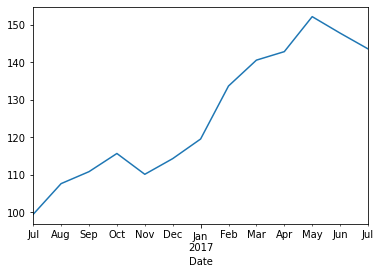

In [ ]:
stock.Close.resample('M').mean().plot()

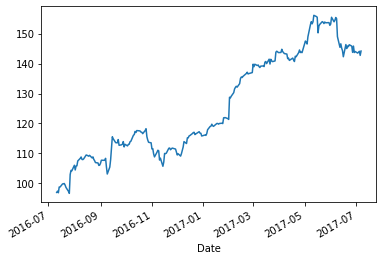

In [ ]:
stock.Close.plot()

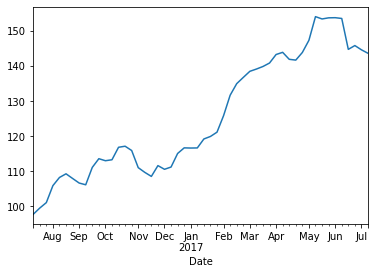

In [ ]:
stock.Close.resample('W').mean().plot()

### Filter
In the previous exercise, you computed the mean birth weight for full-term babies; you filtered out preterm babies because their distribution of weight is different.

The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean.

* Use the variable 'nbrnaliv' to make a Boolean Series that is True for single births (where 'nbrnaliv' equals 1) and False otherwise.

In [ ]:
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.392597951914515


In [ ]:
single = nsfg.nbrnaliv == 1

* Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.

In [ ]:
single_full_term_weight = birth_weight[single & full_term]

In [ ]:
print('Single baby with full term weight ' , single_full_term_weight.mean())

Single baby with full term weight  7.40297320308299


* For comparison, select multiple, full-term babies and compute their mean birth weight.

In [ ]:
multiple_full_term_baby = birth_weight[~single & full_term]
print('Multple Babay with full term weight ', multiple_full_term_baby.mean())

Multple Babay with full term weight  5.784722222222222


## Distributions

In the first chapter, having cleaned and validated your data, you began exploring it by using histograms to visualize distributions. In this chapter, you'll learn how to represent distributions using Probability Mass Functions (PMFs) and Cumulative Distribution Functions (CDFs). You'll learn when to use each of them, and why, while working with a new dataset obtained from the General Social Survey.

### Probability Mass Function

**GSS**

* Annual sample of U.S. population.
* Ask about demographics, social and political beliefs
* Widely used by policy makers and researchers.

In [ ]:
gss = pd.read_hdf('/content/drive/My Drive/DataCamp_DataScience/Eploratory Data Analysis/gss.hdf5','gss')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


Lets check the number of edu

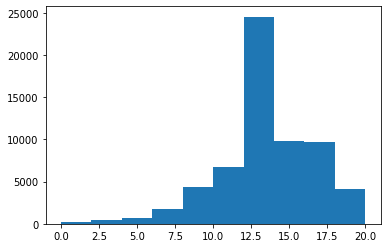

In [ ]:
educ = gss['educ']
plt.hist(educ.dropna(), label = 'educ')
plt.show()

But here histogram is not the right kind of plot to determine any thing.

We will use PMF (probability mass function) for interpretation

### Calculating Pmf

In [ ]:
!pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.3.9-cp36-none-any.whl size=10157 sha256=90f69aea42d58393d7fd03f7c94a70eab845a92cec03a92baf82652735714c89
  Stored in directory: /root/.cache/pip/wheels/bf/70/8c/55788f5a5806e6da295e5da80d2c0ef286d9a8260a1e3142e1
Successfully built empiricaldist


In [ ]:
from empiricaldist import Pmf

#### Defining Pmf Function

Check this for more description:

https://nbviewer.jupyter.org/github/AllenDowney/empiricaldist/blob/master/empiricaldist/dist_demo.ipynb

In [ ]:
Pmf.from_seq(educ, normalize = False).head()

0.0    144
1.0     38
2.0    151
3.0    246
4.0    290
Name: educ, dtype: int64

In [ ]:
Pmf.from_seq(educ, normalize = False)[12]

19145

In [ ]:
Pmf.from_seq(educ, normalize = True)

,probs
0.0,0.002311
1.0,0.000610
2.0,0.002424
3.0,0.003948
4.0,0.004655
5.0,0.006083
6.0,0.013514
7.0,0.013803
8.0,0.038858
9.0,0.031507


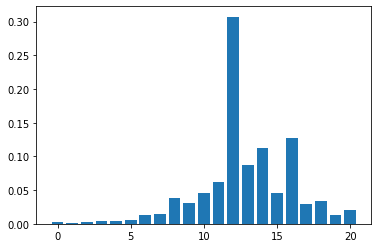

In [ ]:
Pmf.from_seq(educ, normalize = True).bar()

###Make a PMF

    The GSS dataset has been pre-loaded for you into a DataFrame called gss. You can explore it in the IPython Shell to get familiar with it.

    In this exercise, you'll focus on one variable in this dataset, 'year', which represents the year each respondent was interviewed.

    The Pmf class you saw in the video has already been created for you.

* Make a PMF for year with normalize=False and display the result.

In [ ]:
# Compute the Pmf for the year

pmf_year = Pmf.from_seq(gss.year,normalize=False)

In [ ]:
pmf_year

,probs
1972,1613
1973,1504
1974,1484
1975,1490
1976,1499
1977,1530
1978,1532
1980,1468
1982,1860
1983,1599


* How many respondents were interviewed in 2016?

In [ ]:
pmf_year[2016]

2867

### Plot a PMF
Now let's plot a PMF for the age of the respondents in the GSS dataset. The variable 'age' contains respondents' age in years.

* Select the 'age' column from the gss DataFrame and store the result in age.

In [ ]:
# Select age column
age = gss.age
age.head()

0    26.0
1    38.0
2    57.0
3    61.0
4    59.0
Name: age, dtype: float64

* Make a normalized PMF of age. Store the result in pmf_age.

In [ ]:
pmf_age = Pmf.from_seq(age, normalize=True)
pmf_age.head()

18.0    0.005620
19.0    0.019878
20.0    0.018111
21.0    0.019219
22.0    0.020247
Name: age, dtype: float64

* Plot pmf_age as a bar chart.

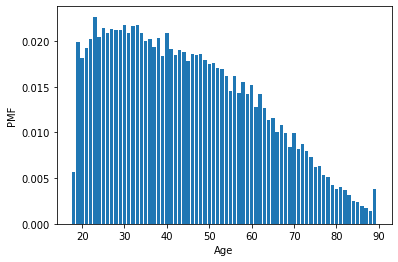

In [ ]:
pmf_age.bar(label = 'educ')
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

### Cumulative distribution functions

__From PMF to CDF__

If you draw a random element from a sample:

* PMF is the probability that you will get exectly x
* CDF is the probability that you will get exectly <= x


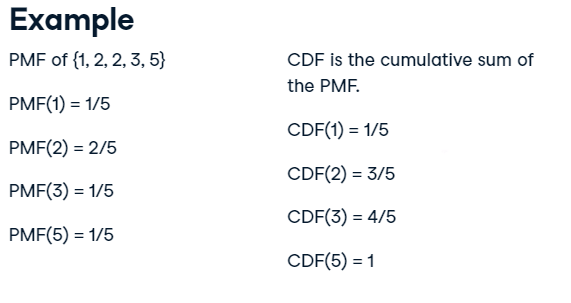

**Calculate CDF**

In [ ]:
from empiricaldist import Cdf

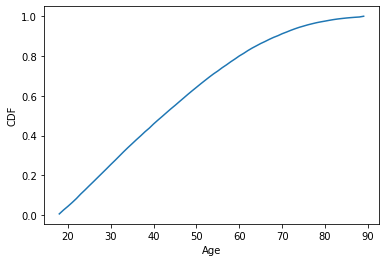

In [ ]:
cdf = Cdf.from_seq(gss.age)
cdf.plot()
plt.xlabel('Age')
plt.ylabel('CDF')
plt.show()

We can find the cdf of particular element.

In [ ]:
cdf(51)

array(0.66020135)

That 0.6602 is basically showing the percentile for 51. Mean not more then 66.02 percent people are aboved 51 year old.

In [ ]:
# Inverse CDF
cdf.inverse(0.75)

array(57.)

Here in inverse we are providing the percentile as a input and it returns the number from the array that is less then that percentile

### Make a CDF
In this exercise, you'll make a CDF and use it to determine the fraction of respondents in the GSS dataset who are OLDER than 30.

The GSS dataset has been preloaded for you into a DataFrame called gss.

As with the Pmf class from the previous lesson, the Cdf class you just saw in the video has been created for you, and you can access it outside of DataCamp via the empiricaldist library.

In [ ]:
gss = pd.read_hdf('/content/drive/MyDrive/DataCamp_DataScience/Eploratory Data Analysis/gss.hdf5')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


* Select the 'age' column. Store the result in age.

In [ ]:
age = gss.age
age.head()

0    26.0
1    38.0
2    57.0
3    61.0
4    59.0
Name: age, dtype: float64

* Compute the CDF of age. Store the result in cdf_age.

In [ ]:
cdf_age = Cdf.from_seq(age)

* Calculate the CDF of 30.

In [ ]:
print(cdf_age(30))

0.2539137136526389


* What fraction of the respondents in the GSS dataset are OLDER than 30?

In [ ]:
round((1-cdf_age(30)) * 100)

75.0

so answer is 75%

### Compute IQR

Recall from the video that the interquartile range (IQR) is the difference between the 75th and 25th percentiles. It is a measure of variability that is robust in the presence of errors or extreme values.

In this exercise, you'll compute the interquartile range of income in the GSS dataset. Income is stored in the 'realinc' column, and the CDF of income has already been computed and stored in cdf_income.

* Calculate the 75th percentile of income and store it in percentile_75th
* Calculate the 25th percentile of income and store it in percentile_25th
* Calculate the interquartile range of income. Store the result in iqr

In [ ]:
cdf_income = Cdf.from_seq(gss.realinc)

In [ ]:
percentile75 = cdf_income.inverse(0.75)

In [ ]:
percentile25 = cdf_income.inverse(0.25)

In [ ]:
iqr = percentile75 - percentile25

* __Question__ : What is the interquartile range (IQR) of income in the GSS datset?

In [ ]:
percentile25

array(13750.)

In [ ]:
percentile75

array(43426.)

In [ ]:
iqr

29676.0

### Plot a CDF

The distribution of income in almost every country is long-tailed; that is, there are a small number of people with very high incomes.

In the GSS dataset, the variable 'realinc' represents total household income, converted to 1986 dollars. We can get a sense of the shape of this distribution by plotting the CDF.

* Select 'realinc' from the gss dataset.
* Make a Cdf object called cdf_income.
* Create a plot of cdf_income using .plot().

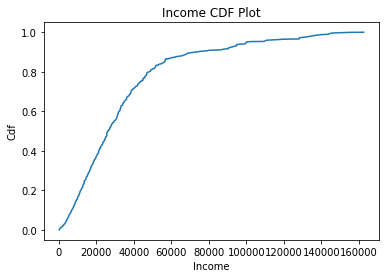

In [ ]:
cdf_income = Cdf.from_seq(gss['realinc'])

# Plot
cdf_income.plot()
plt.title('Income CDF Plot')
plt.xlabel('Income')
plt.ylabel('Cdf')
plt.show()

### Distribution of education

Let's begin comparing incomes for different levels of education in the GSS dataset, which has been pre-loaded for you into a DataFrame called gss. The variable educ represents the respondent's years of education.

What fraction of respondents report that they have 12 years of education or fewer?

In [ ]:
gss.columns

Index(['year', 'age', 'cohort', 'sex', 'race', 'educ', 'realinc', 'gunlaw',
       'grass', 'wtssall'],
      dtype='object')

In [ ]:
edu_cdf = Cdf.from_seq(gss.educ)
edu_cdf(12)

array(0.53226117)

Answer is approx : 53%

### Extract education levels

Let's create Boolean Series to identify respondents with different levels of education.

In the U.S, 12 years of education usually means the respondent has completed high school (secondary education). A respondent with 14 years of education has probably completed an associate degree (two years of college); someone with 16 years has probably completed a bachelor's degree (four years of college).

* Complete the line that identifies respondents with associate degrees, that is, people with 14 or more years of education but less than 16.
* Complete the line that identifies respondents with 12 or fewer years of education.
* Confirm that the mean of high is the fraction we computed in the previous exercise, about 53%.

In [ ]:
educ = gss['educ']
bach = educ > 16
assc = (educ >= 14) & (educ < 16)
high = educ <= 12
print(high.mean())

0.5308807991547402


### Plot income CDFs
Let's now see what the distribution of income looks like for people with different education levels. You can do this by plotting the CDFs. Recall how Allen plotted the income CDFs of respondents interviewed before and after 1995:

You can assume that Boolean Series have been defined, as in the previous exercise, to identify respondents with different education levels: high, assc, and bach.

In [ ]:
income = gss.realinc

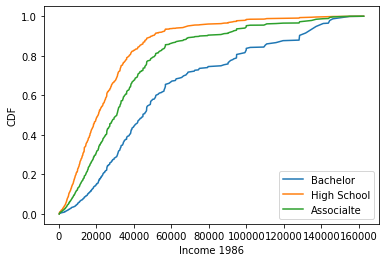

In [ ]:
Cdf.from_seq(income[bach]).plot(label = 'Bachelor')
Cdf.from_seq(income[high]).plot(label = 'High School')
Cdf.from_seq(income[assc]).plot(label = 'Associalte')
plt.xlabel("Income 1986")
plt.ylabel("CDF")
plt.legend()
plt.show()

Nice job. It might not be surprising that people with more education have higher incomes, but looking at these distributions, we can see where the differences are.

### Model Distribution

* PMF don't work very well when data have large number of unique values

* Lets discuss about PDF (probability density function) and learn how to estimate pdf from the data


Let's Start with __normal distribution__ also known as _Galcian Distribution__:

#### Normal Distribution

As we know most of the thing that we measure in the world are normally distributed.

To get the sense how the normal distribution look like we will use __numpy__ to generate random value which are normally distributed and will plot the __CDF__ for the same using Cdf from the modules.

In [ ]:
sample = np.random.normal(size = 1000)

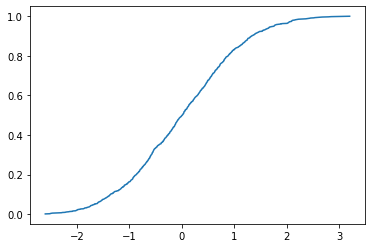

In [ ]:
Cdf.from_seq(sample).plot()


This is a sygmoid shape what we can except from the normal distribution

#### Normal CDF.

__Scify__ provide the package called norm. which we can use to understand the normal distribution

In [ ]:
from scipy.stats import norm, binom
xs = np.linspace(-3,3)
ys = norm(0,1).cdf(xs)

we will use linspace to create an array with equally space point from -3 and 3. __norm(0,1)__ represent the a normal distribution with mean 0 and standard deviation 1.

then __.cdf()__ evaluate the CDF of normal distribution

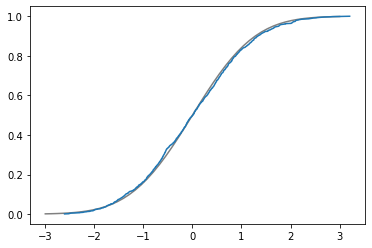

In [ ]:
plt.plot(xs,ys,color = 'gray')
Cdf.from_seq(sample).plot()
plt.show()

Here we are ploting the ploting the result with gray line and together with a sequencial number for nomal distribution of sample_size 1000.

We can see that Cdf for the sample is very close the cdf for the whole range. If that (xs, ys) was the real data then we made conclusion that the normal distribution a good model for the data

#### Bell Curve

The norm object also provide __dot pdf__ which means probability density function or PDF. Which will show us the bell shaped curve.

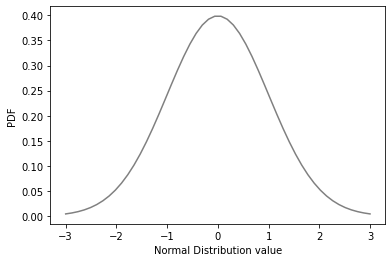

In [ ]:
xs = np.linspace(-3,3)
ys = norm(0,1).pdf(xs)
plt.plot(xs,ys,color = 'gray')
plt.ylabel('PDF')
plt.xlabel('Normal Distribution value')
plt.show()

Unfortunatelly if we compare this PDF with pmf then it will not work properly

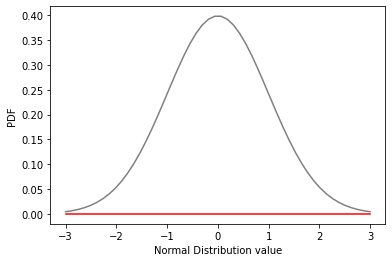

In [ ]:
xs = np.linspace(-3,3)
ys = norm(0,1).pdf(xs)
plt.plot(xs,ys,color = 'gray')
plt.plot(xs, binom(0,1).pmf(xs),color = 'red')
plt.ylabel('PDF')
plt.xlabel('Normal Distribution value')
plt.show()

__pmf of this sample is a flat line accros the bottom__

In random sample every value is unique so the probabilty of every element is 1/1000.

However, we can use the points in the sample to estimate the PDF of the distribution they came from.

#### Kde Plot

This process is called Kernal  density estimation, or KDE. It's way of getting from a PMF, a probability mass funtion, to a PDF, a probabilty density function. To generate the KDE plot we will use `seaborn` library for data visualization.

In [ ]:
import seaborn as sns

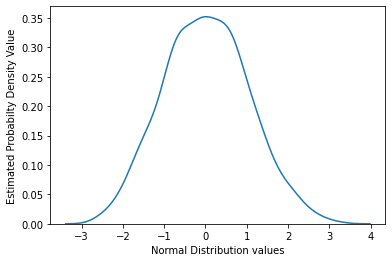

In [ ]:
sns.kdeplot(sample)
plt.xlabel('Normal Distribution values')
plt.ylabel('Estimated Probabilty Density Value')
plt.show()

#### KDE and PDF

Now we can compare the kde plot and normal pdf.

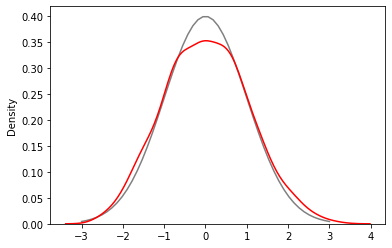

In [ ]:
xs = np.linspace(-3,3)
ys = norm.pdf(xs)
plt.plot(xs,ys,color = 'gray')
sns.kdeplot(sample, color='Red')
plt.show()

# PMF , CDF and KDE

* __Use CDF for exploration__
* __Use PMF if there are a small number of unique values__
* __Use KDE if there are a lot of values__

CDF is a best view of whats going on without getting distracted by noise. The biggest drawback of cdf is they are less well known. 

There we can use PMF we are presenting the result to the audiences.